### <center><b> TRỰC QUAN HÓA DỮ LIỆU - 21KHDL </b></center>
# <p style="text-align:center;color:#254E58"><b> LAB 03 - IRIS </b></p>

---

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Thông tin thành viên</b></div>

- 21127115 - Trần Thanh Ngân
- 21127229 - Dương Trường Bình
- 21127616 - Lê Phước Quang Huy

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Mục lục</b></div>

<div class="list-group" id="list-tab" role="tablist">

   * [Đọc dữ liệu](#1)
        
   * [A. Mô tả dữ liệu](#A)
   
   * [B. Khám phá và Phân tích dữ liệu](#B)
        - [Câu hỏi 1](#B.1)
        - [Câu hỏi 2](#B.2)
        - [Câu hỏi 3](#B.3)
   
   * [C. Insights](#C)
   

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Các thư viện sử dụng</b></div>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import display
import math

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Đọc dữ liệu</b></div>

## <span style='color:#074173'> <b> 👉 Iris Species Dataset </b> </span>

In [3]:
# read data iris in folder data
df = pd.read_csv('../data/Iris.csv')
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
102,103,7.1,3.0,5.9,2.1,Iris-virginica
34,35,4.9,3.1,1.5,0.1,Iris-setosa
149,150,5.9,3.0,5.1,1.8,Iris-virginica
49,50,5.0,3.3,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Số lượng mẫu của từng giống loài
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
df.describe().round(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00,150.00,150.00,150.00,150.00
mean,75.50,5.84,3.05,3.76,1.20
std,43.45,0.83,0.43,1.76,0.76
min,1.00,4.30,2.00,1.00,0.10
25%,38.25,5.10,2.80,1.60,0.30
50%,75.50,5.80,3.00,4.35,1.30
75%,112.75,6.40,3.30,5.10,1.80
max,150.00,7.90,4.40,6.90,2.50


# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>A. Mô tả dữ liệu</b></div>

- Tập dữ liệu [Iris Species](https://www.kaggle.com/datasets/uciml/iris/data) bao gồm ba giống loài `iris` với 50 mẫu mỗi loài cũng như một số đặc tính về mỗi loài hoa. Một loài hoa có thể phân tách tuyến tính với hai loài còn lại, nhưng hai loài còn lại không thể phân tách tuyến tính với nhau.

## <span style='color:#074173'> <b>👉 Iris Species </b> </span>

Tập dữ liệu `Iris.csv` chứa 150 dòng và 6 cột, mỗi dòng tương ứng với đặc điểm của một loài hoa:

|STT | Tên thuộc tính | Mô tả | Giá trị | Kiểu dữ liệu |
|:---| :---           |:---   |:---     |:---          |
| 1  | Id | Mã của hoa | Nằm trong phạm vi từ 1 đến 150 mẫu, với 50 mẫu cho mỗi giống loài | Integer |
| 2  | SepalLengthCm  | Chiều dài lá | Nằm trong khoảng từ 4.3 đến 7.9 | Float |
| 3  | SepalWidthCm | Chiều rộng lá | Nằm trong khoảng từ 2 đến 4.4 | Float |
| 4  | PetalLengthCm | Chiều dài cánh hoa | Nằm trong khoảng từ 1 đến 6.9 | Float |
| 5  | PetalWidthCm | Chiều rộng cánh hoa | Nằm trong khoảng từ 0.1 đến 2.5 | Float |
| 6  | Species | Giống loài hoa | Gồm 3 loại `Iris-setosa`, `Iris-versicolor` và `Iris-virginica` | String |

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>B. Phân tích tổng quan dữ liệu</b></div>

## <span style='color:#074173'> <b> 👉 Tỷ lệ dữ liệu bị thiếu </b> </span>

In [7]:
missing_rates = df.isna().sum() / len(df) * 100
missing_rates_df = pd.DataFrame({'Tên cột': missing_rates.index, 'Tỷ lệ thiếu dữ liệu (%)': missing_rates.values})
missing_rates_df = missing_rates_df.sort_values(by="Tỷ lệ thiếu dữ liệu (%)", ascending=False)
missing_rates_df.style.background_gradient(cmap='Reds', subset=['Tỷ lệ thiếu dữ liệu (%)'])

,Tên cột,Tỷ lệ thiếu dữ liệu (%)
0,Id,0.000000
1,SepalLengthCm,0.000000
2,SepalWidthCm,0.000000
3,PetalLengthCm,0.000000
4,PetalWidthCm,0.000000
5,Species,0.000000


#### <span style='color:#074173'> 💬 Nhận xét: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Như vậy tập dữ liệu không có dữ liệu bị thiếu.

## <span style='color:#074173'> <b>👉 Phân phối của các cột dữ liệu </b> </span>

In [8]:
## Chia loại dữ liệu numerical hoặc categorical
cate_list = list(df.dtypes[df.dtypes == 'object'].index)
num_list = list(df.dtypes[df.dtypes != 'object'].index)

- ### Cột Categorical

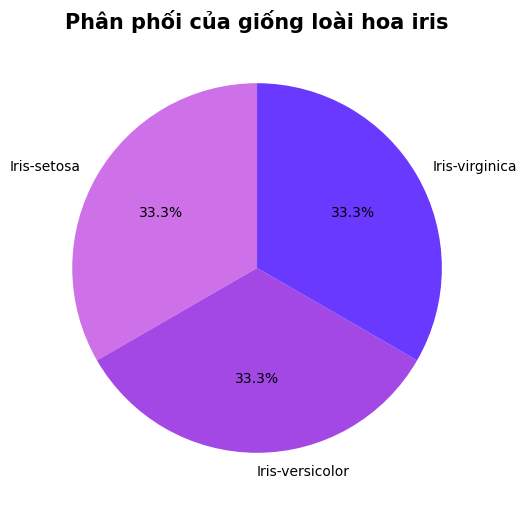

In [9]:
# Vẽ biểu đồ tròn phân phối của Species
plt.figure(figsize=(10, 6))
df['Species'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ce70e8', '#a347e5', '#6a39ff'])
plt.title('Phân phối của giống loài hoa iris', fontsize=15, fontweight='bold')
plt.ylabel('')
plt.show()

#### <span style='color:#074173'> 💬 Nhận xét: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Ba giống loài hoa iris là `Iris-setosa`, `Iris-virginica` và `Iris-versicolor` phân bố đồng đều, với 50 mẫu dữ liệu cho mỗi giống loài (33.3%).

- ### Cột Numerical

In [10]:
custom_colors = ['#1f77b4', 'skyblue', 'cornflowerblue']

numerical_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

num_cols = 2
num_rows = (len(numerical_features[1:]) + num_cols - 1) // num_cols
fig = make_subplots(rows=num_rows, cols=num_cols)

for i, col in enumerate(numerical_features[1:], start=1):
    row_num = (i - 1) % num_rows + 1
    col_num = (i - 1) // num_rows + 1
    fig.add_trace(
        go.Box(
            x=df[col],
            name=col,
            marker_color='#1f77b4',  
            line_color='#1f77b4'     
        ),
        row=row_num,
        col=col_num
    )

fig.update_layout(title_text="Boxplots cho các cột Numerical", showlegend=False)
fig.show()

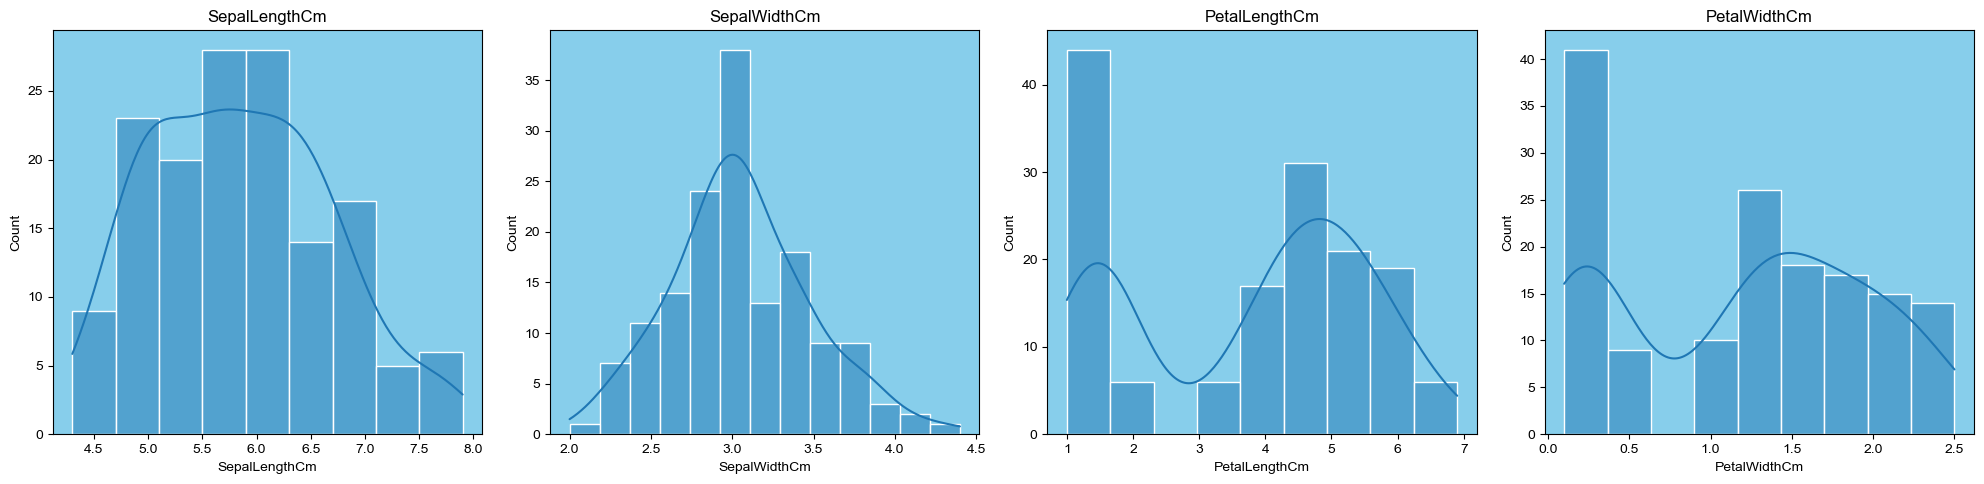

In [11]:
numeric_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

num_features = len(numeric_features[1:])
num_rows = math.ceil(num_features / 4) 
num_cols = min(num_features, 4)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, 5*num_rows))
axes = axes.flatten()
sns.set_theme(style="darkgrid")

for i, col in enumerate(numeric_features[1:]):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_facecolor('skyblue') 

for i in range(num_features, num_rows*num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#### <span style='color:#074173'> 💬 Nhận xét: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Từ biểu đồ Boxplot ở trên chúng ta có thể thấy rằng `SepalWidthCm` chứa một số ngoại lệ và tất cả các giá trị khác đều khá ổn.

- `Chiều dài của đài hoa (SepalLengthCm)`: Phân phối này có dạng phân phối chuẩn tương đối, với nhiều quan sát tập trung trong khoảng từ 5 - 7 cm.

- `Chiều rộng của đài hoa (SepalWidthCm)`: Phân phối này cũng khá chuẩn nhưng có một đỉnh rõ rệt xung quanh giá trị 3 cm. Điều này có thể cho thấy rằng chiều rộng của đài hoa trong tập dữ liệu này có xu hướng tập trung nhiều vào một giá trị cụ thể.

- `Chiều dài của cánh hoa (PetalLengthCm)`: Phân phối này cho thấy có hai nhóm dữ liệu rõ rệt, một nhóm có chiều dài ngắn hơn (từ 1 - 2 cm) và nhóm còn lại có chiều dài dài hơn (từ 3 - 6 cm). Điều này giúp nhận biết sự phân chia trong đặc tính của chiều dài cánh hoa và có thể liên quan đến sự phân biệt giữa các loài trong tập dữ liệu iris.

- `Chiều rộng của cánh hoa (PetalWidthCm)`: Phân phối này cũng cho thấy sự tồn tại của hai nhóm dữ liệu. Một nhóm quan sát tập trung chủ yếu dưới 1 cm và nhóm còn lại tập trung trong khoảng từ 1 - 2,5 cm. Đây cũng có thể là dấu hiệu của sự phân biệt giữa các loài trong tập dữ liệu.


## <span style='color:#074173'> <b>👉 Phân tích giữa 4 biến Numerical và biến Species </b> </span>

- Việc phân tích hai biến là một phương pháp thống kê được sử dụng để khám phá mối quan hệ giữa hai biến cùng một lúc. Phân tích này rất quan trọng để xác định các mối quan hệ tiềm ẩn, xác định mối liên hệ giữa các biến số và hiểu rõ hơn về đặc tính chung của chúng.


### <span style='color:#074173'> <b>❓ SepalLengthCm vs. Species</b> </span>

In [12]:
fig_boxplot = px.box(df, x="Species", y="SepalLengthCm", title="Boxplot of SepalLengthCm by Species",
                     color='Species',  
                     color_discrete_sequence=custom_colors 
                    )
fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="SepalLengthCm")
fig_boxplot.show()

#### <span style='color:#074173'> 💬 Quan sát: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Từ biểu đồ trên, có thể thấy rõ rằng loài Virginica có giá trị trung bình về Chiều dài đài hoa (SepalLengthCm) cao hơn so với các loài khác. Ngược lại, loài Setosa thể hiện giá trị trung bình của Chiều dài đài hoa thấp hơn.

- Giá trị tối đa của Chiều dài đài hoa của loài Setosa là 5,8cm và giá trị thấp hơn của loài Setosa là 4,3cm.

- Giá trị tối đa của Chiều dài đài hoa của các loài Versicolor là 7cm và giá trị thấp hơn là 4,9.

- Giá trị tối đa của Chiều dài đài hoa của loài Virginica là 7,9cm và giá trị thấp hơn là 5,6.


### <span style='color:#074173'> <b>❓ SepalWidthCm vs. Species</b> </span>

In [13]:
fig_boxplot = px.box(df, x="Species", y="SepalWidthCm", title="Boxplot of SepalWidthCm by Species",
                     color='Species', 
                     color_discrete_sequence=custom_colors 
                    )
fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="SepalWidthCm")
fig_boxplot.show()

#### <span style='color:#074173'> 💬 Quan sát: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Ta có thể thấy rõ rằng loài Setosa có giá trị trung bình về Chiều rộng đài hoa (SepalWidthCm) cao hơn so với các loài khác. Ngược lại, loài Versicolor thể hiện giá trị trung bình của Độ rộng đài hoa thấp hơn.

- Giá trị tối đa của chiều rộng đài hoa của loài Setosa là 4,4cm và giá trị trung bình thấp hơn của chiều rộng đài hoa là 2,3cm.

- Giá trị tối đa của chiều rộng đài hoa của loài Versicolor là 3,4cm và giá trị thấp hơn là 2cm.

- Giá trị tối đa của chiều rộng đài hoa của loài Virginica là 3,8cm và giá trị thấp hơn là 2,2cm.


### <span style='color:#074173'> <b>❓ PetalLengthCm vs. Species</b> </span>

In [14]:
fig_boxplot = px.box(df, x="Species", y="PetalLengthCm", title="Boxplot of PetalLengthCm by Species",
                     color='Species', 
                     color_discrete_sequence=custom_colors
                    )
fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="PetalLengthCm")
fig_boxplot.show()

#### <span style='color:#074173'> 💬 Quan sát: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Từ biểu đồ trên, có thể thấy rõ loài Virginica có giá trị trung bình về Chiều dài cánh hoa (PetalLengthCm) cao hơn so với các loài khác. Ngược lại, loài Setosa thể hiện giá trị trung bình của Chiều dài cánh hoa thấp hơn.

- Giá trị tối đa của Chiều dài cánh hoa của loài Setosa là 1,9cm và giá trị trung bình thấp hơn của Setosa là 1.

- Giá trị tối đa của chiều dài cánh hoa của loài Versicolor là 5,1 và giá trị trung bình thấp hơn của loài nhiều màu là 3,3.

- Giá trị chiều dài cánh hoa tối đa của các loài Virginica là 6,9 và giá trị trung bình thấp hơn của Virginica là 4,5.


### <span style='color:#074173'> <b>❓ PetalWidthCm vs. Species</b> </span>

In [15]:
fig_boxplot = px.box(df, x="Species", y="PetalWidthCm", title="Boxplot of PetalWidthCm by Species",
                     color='Species',
                     color_discrete_sequence=custom_colors
                    )
fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="PetalWidthCm")
fig_boxplot.show()

#### <span style='color:#074173'> 💬 Quan sát: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Từ biểu đồ trên, có thể thấy rõ rằng loài Virginica có giá trị trung bình về Chiều rộng cánh hoa (PetalWidthCm) cao hơn so với các loài khác. Ngược lại, loài Setosa thể hiện giá trị trung bình của Chiều rộng cánh hoa thấp hơn.

- Giá trị tối đa của Chiều dài cánh hoa của loài Setosa là 0,6cm và giá trị trung bình thấp hơn của Setosa là 0,1.

- Giá trị tối đa của chiều dài cánh hoa của loài Versicolor là 1,8cm và giá trị trung bình thấp hơn của loài nhiều màu là 1cm.

- Giá trị chiều dài cánh hoa tối đa của loài Virginica là 2,5cm và giá trị trung bình thấp hơn của loài Virginica là 1,4cm.

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>C. Khám phá và đặt câu hỏi về dữ liệu</b></div>

# <div style="padding:10px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>❓ Câu hỏi 1: Phân phối của các đặc tính của hoa Iris như thế nào? Có sự khác biệt nào rõ rệt khi xem xét phân bố của các đặc tính không?</b></div>

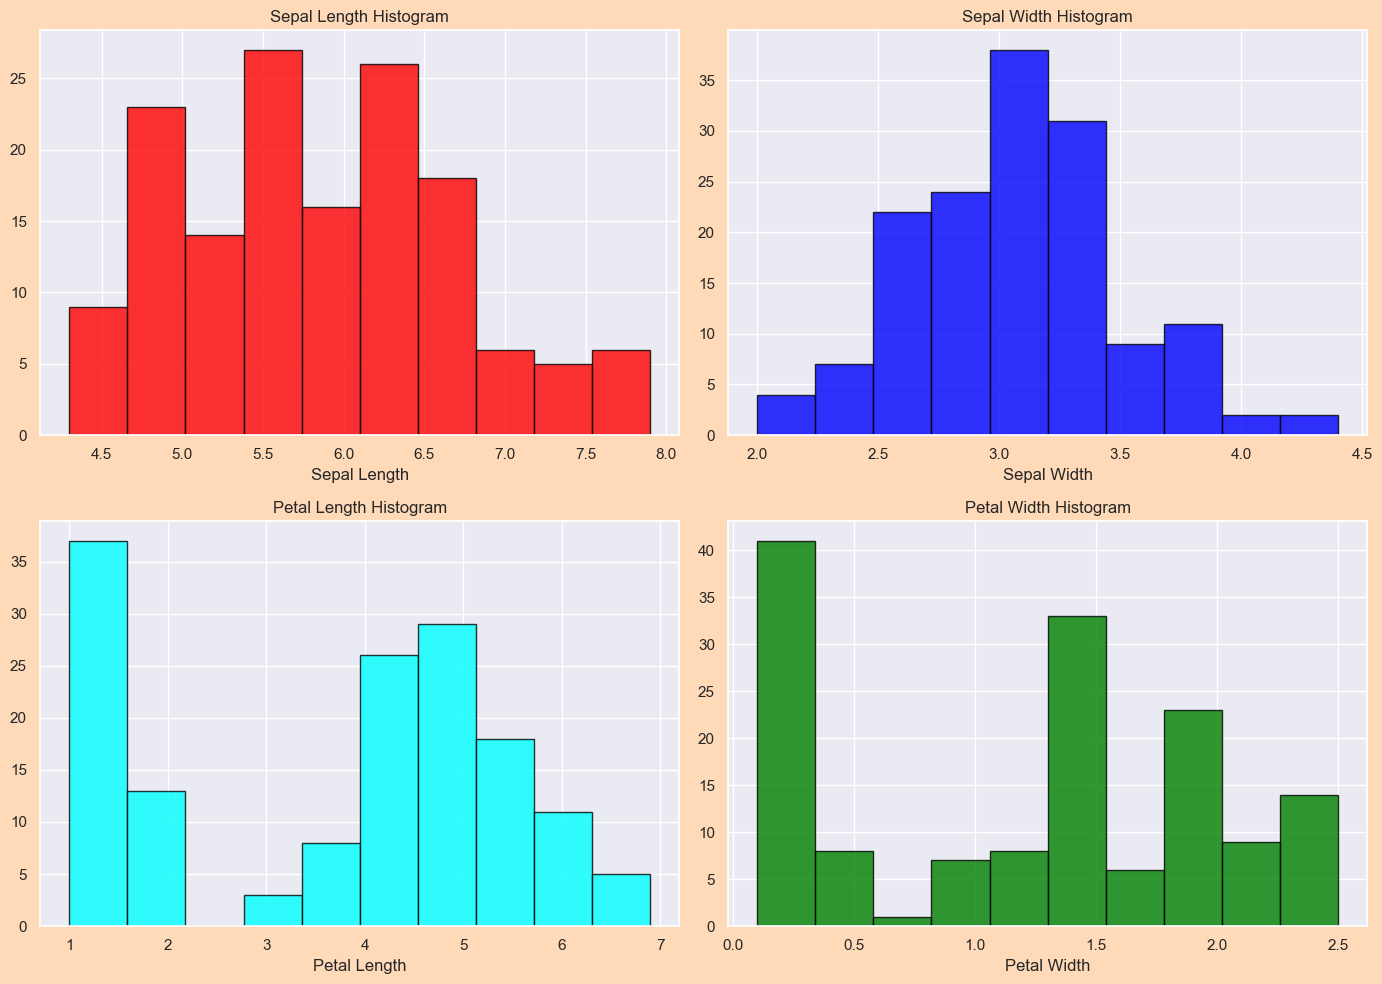

In [16]:
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['figure.facecolor'] = '#FFDAB9'

fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(df['SepalLengthCm'],  color='red', edgecolor='black', alpha=0.8)
axs[0, 0].set_xlabel('Sepal Length')
axs[0, 0].set_title('Sepal Length Histogram')

axs[0, 1].hist(df['SepalWidthCm'],  color='blue', edgecolor='black', alpha=0.8)
axs[0, 1].set_xlabel('Sepal Width')
axs[0, 1].set_title('Sepal Width Histogram')

axs[1, 0].hist(df['PetalLengthCm'],  color='cyan', edgecolor='black', alpha=0.8)
axs[1, 0].set_xlabel('Petal Length')
axs[1, 0].set_title('Petal Length Histogram')

axs[1, 1].hist(df['PetalWidthCm'],  color='green', edgecolor='black', alpha=0.8)
axs[1, 1].set_xlabel('Petal Width')
axs[1, 1].set_title('Petal Width Histogram')

plt.tight_layout()
plt.show()

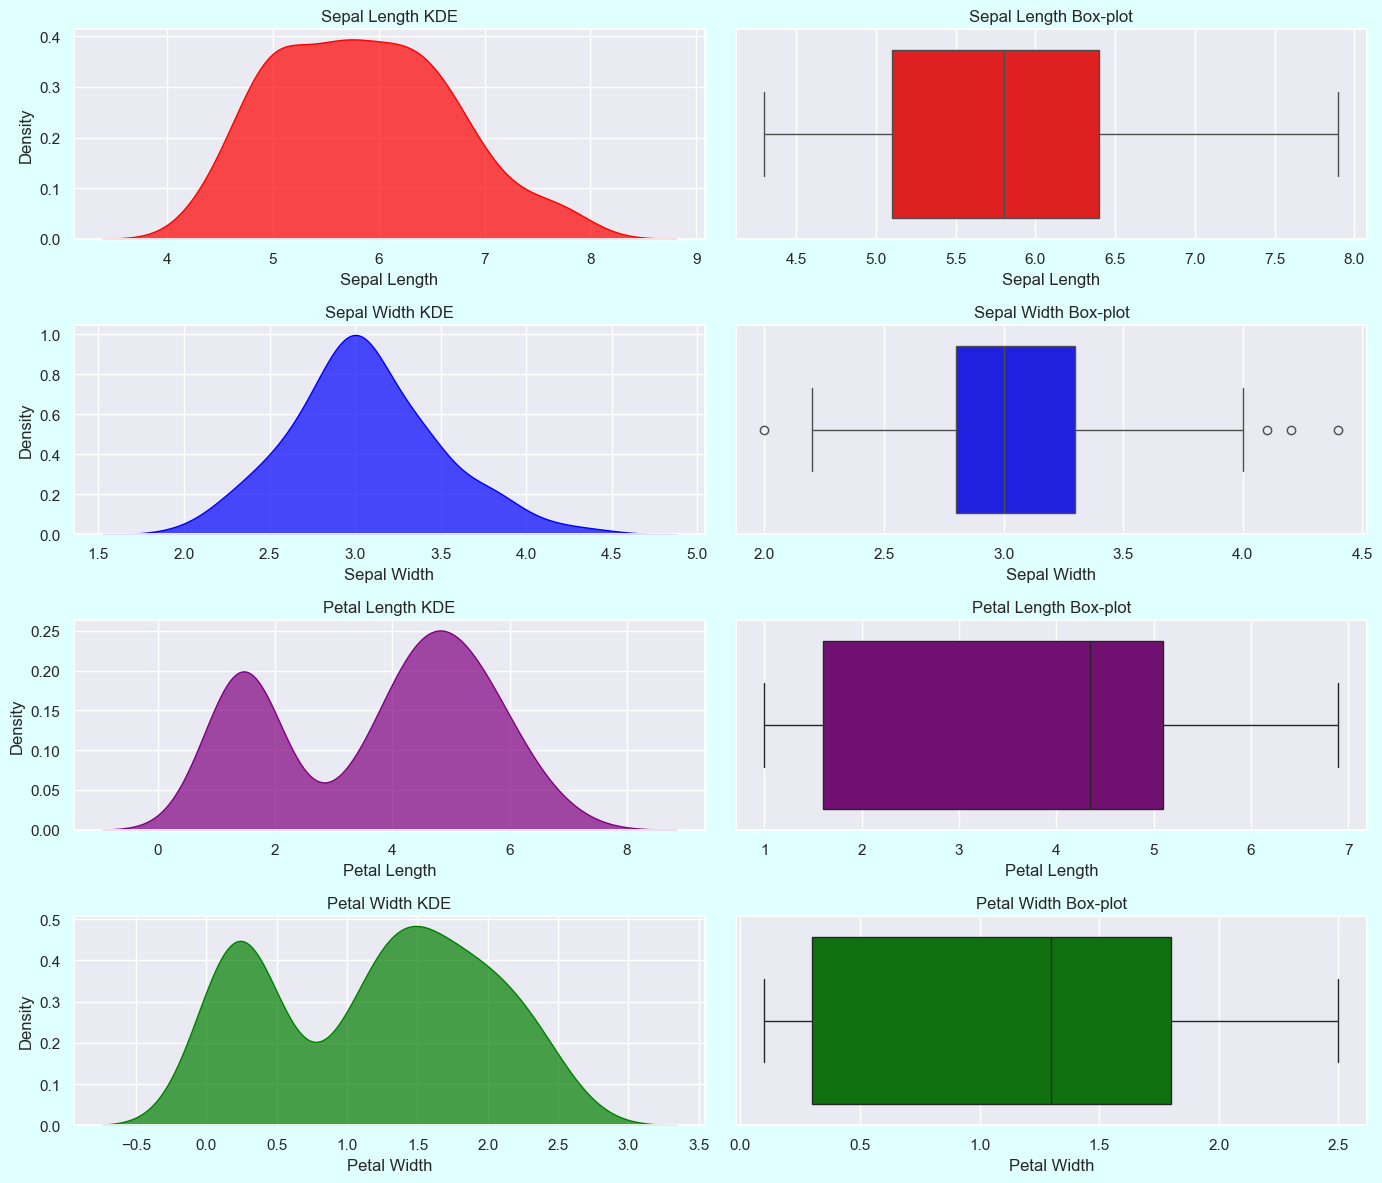

In [17]:
plt.figure(figsize=(14, 12))
plt.gcf().set_facecolor("#E0FFFF")

plt.subplot(4, 2, 1)
sns.kdeplot(df['SepalLengthCm'], color='red', fill=True, alpha=0.7)
plt.xlabel('Sepal Length')
plt.title('Sepal Length KDE')

plt.subplot(4, 2, 2)
sns.boxplot(data=df, x='SepalLengthCm', color='red')
plt.xlabel('Sepal Length')
plt.title('Sepal Length Box-plot')

plt.subplot(4, 2, 3)
sns.kdeplot(df['SepalWidthCm'], color='blue', fill=True, alpha=0.7)
plt.xlabel('Sepal Width')
plt.title('Sepal Width KDE')

plt.subplot(4, 2, 4)
sns.boxplot(data=df, x='SepalWidthCm', color='blue')
plt.xlabel('Sepal Width')
plt.title('Sepal Width Box-plot')

plt.subplot(4, 2, 5)
sns.kdeplot(df['PetalLengthCm'], color='purple', fill=True, alpha=0.7)
plt.xlabel('Petal Length')
plt.title('Petal Length KDE')

plt.subplot(4, 2, 6)
sns.boxplot(data=df, x='PetalLengthCm', color='purple')
plt.xlabel('Petal Length')
plt.title('Petal Length Box-plot')

plt.subplot(4, 2, 7)
sns.kdeplot(df['PetalWidthCm'], color='green', fill=True, alpha=0.7)
plt.xlabel('Petal Width')
plt.title('Petal Width KDE')

plt.subplot(4, 2, 8)
sns.boxplot(data=df, x='PetalWidthCm', color='green')
plt.xlabel('Petal Width')
plt.title('Petal Width Box-plot')

plt.tight_layout()
plt.show()

#### <span style='color:#074173'> 💬 Trả lời: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Ở câu hỏi đầu tiên, nhóm đã trực quan biểu đồ histogram và boxplot để xem xét về tổng quan về phân bố của các đặc tính của hoa Iris.

- Đối với đặc tính `SepalLengthCm`, `SepalWidthCm`, tức là chiều dài và chiều rộng của lá, ta thấy rằng phân phối của chúng khá giống nhau và boxplot cho thấy khoảng giá trị hẹp hơn so với 2 đặc trưng còn lại, , khó để thấy sự khác biệt rõ rệt giữa các loại hoa.

- Đối với đặc tính `PetalLengthCm`, `PetalWidthCm`, tức là chiều dài và chiều rộng của cánh hoa, ta thấy rằng có sự tách biệt rõ rệt trong phân phối của 2 đặc tính này qua histogram. Biểu đồ boxplot cũng cho thấy một khoảng giá trị khá rộng. Do đó ta có thể nhận xét: "Có thể có một loài hoa có chiều dài và chiều rộng cánh hoa nhỏ hơn so với các loài hoa còn lại".

- Để biết được rõ hơn về sự khác biệt giữa các loài hoa, nhóm sẽ tiếp tục khám phá ở các câu hỏi tiếp theo.

# <div style="padding:10px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>❓ Câu hỏi 2: Có sự khác biệt của phân bố các đặc tính giữa các loài hoa không?</b></div>

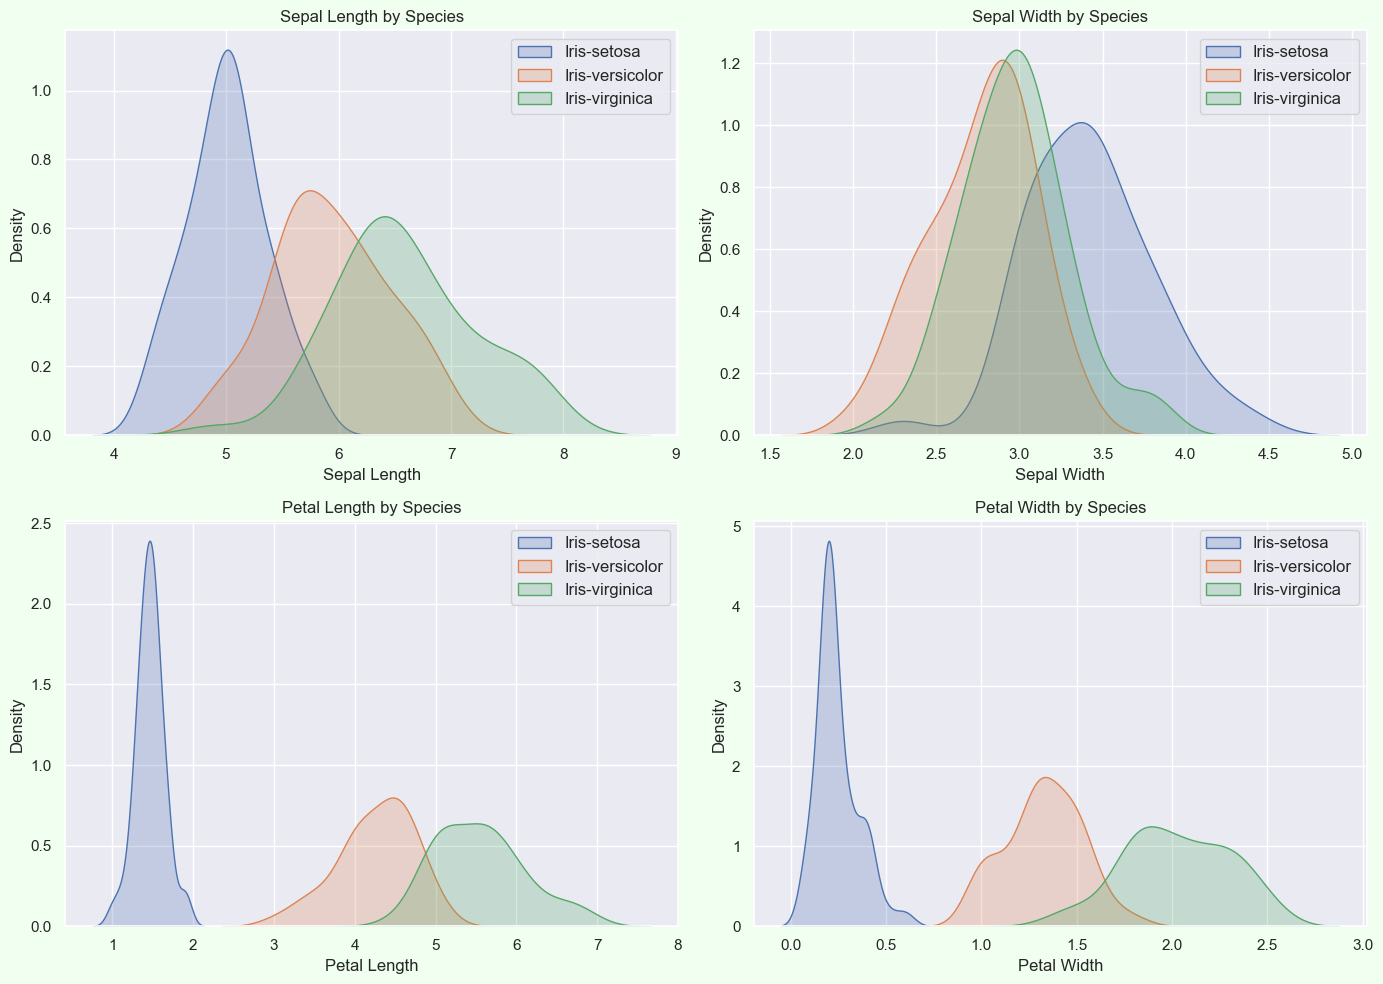

In [18]:
plt.figure(figsize=(14, 10))
plt.gcf().set_facecolor("#F0FFF0")

plt.subplot(2, 2, 1)
for species in df['Species'].unique():
    sns.kdeplot(df[df['Species'] == species]['SepalLengthCm'], shade=True, label=species)
plt.xlabel('Sepal Length')
plt.title('Sepal Length by Species')
plt.legend(fontsize=12)
plt.grid(True)

plt.subplot(2, 2, 2)
for species in df['Species'].unique():
    sns.kdeplot(df[df['Species'] == species]['SepalWidthCm'], shade=True, label=species)
plt.xlabel('Sepal Width')
plt.title('Sepal Width by Species')
plt.legend(fontsize=12)
plt.grid(True)

plt.subplot(2, 2, 3)
for species in df['Species'].unique():
    sns.kdeplot(df[df['Species'] == species]['PetalLengthCm'], shade=True, label=species)
plt.xlabel('Petal Length')
plt.title('Petal Length by Species')
plt.legend(fontsize=12)
plt.grid(True)

plt.subplot(2, 2, 4)
for species in df['Species'].unique():
    sns.kdeplot(df[df['Species'] == species]['PetalWidthCm'], shade=True, label=species)
plt.xlabel('Petal Width')
plt.title('Petal Width by Species')
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

#### <span style='color:#074173'> 💬 Nhận xét: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- `SepalLengthCm`: Chúng ta có thể thấy có sự giao nhau giữa cả iris-setosa và iris-versicolor; giữa iris-versicolor và iris-virginica; cũng như giữa cả 3 loài hoa trong biểu đồ histogram trên. Điều đó làm cho việc phân biệt giữa các loài hoa trở nên khó khăn hơn.

- `SepalWidthCm`: Có sự giao nhau khá nhiều giữa cả 3 loài hoa, đặc biệt là giữa iris-versicolor và iris-virginica, phân bố của chúng dường như trùng vào nhau. Phân bố của loài iris-setosa nằm về phía bên phải hơn so với phân bố ở `SepalLengthCm`. Điều này cho thấy nếu chỉ dựa vào `SepalWidthCm` để phân biệt giữa các loài hoa thì còn khó khăn hơn nữa.

- `PetalLengthCm` và `PetalWidthCm`: Có sự phân biệt rõ rệt giữa các loài hoa, đặc biệt là giữa iris-setosa và 2 loài hoa còn lại. Phân bố của iris-setosa nằm ở phía bên trái hơn so với 2 loài hoa còn lại, còn phân bố của iris-versicolor và iris-virginica có một sự giao nhau nhẹ, nhưng vẫn phân biệt được. Điều này cho thấy rằng `PetalLengthCm` và `PetalWidthCm` là 2 đặc tính quan trọng để phân biệt giữa các loài hoa.

# <div style="padding:10px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>❓ Câu hỏi 3: Những yếu tố nào hình thành nên sự khác biệt của các loài hoa ?</b></div>

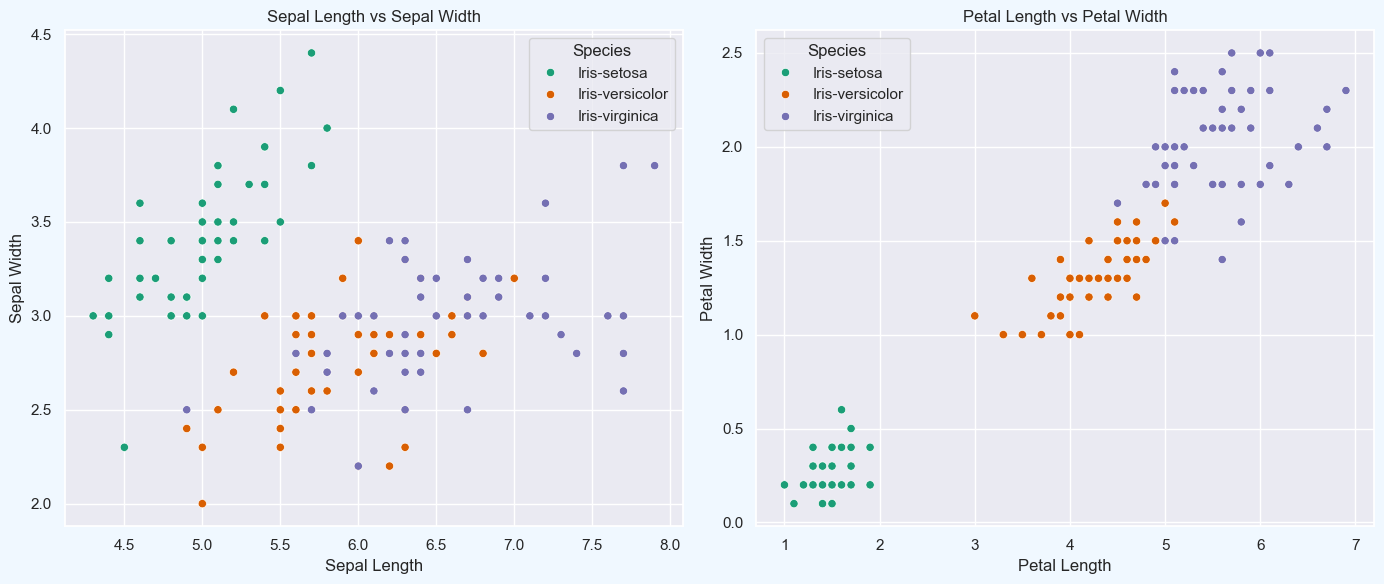

In [19]:
plt.figure(figsize=(14, 6))
plt.gcf().set_facecolor("#F0F8FF")

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='Dark2')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette='Dark2')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')

plt.tight_layout()
plt.show()

#### <span style='color:#074173'> 💬 Trả lời: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Từ biểu đồ 1 ta thấy được:
    - Loài `Setosa` có chiều dài lá đài ngắn hơn nhưng chiều rộng lá đài lớn hơn.
    - Loài `Versicolor`  có chiều dài và rộng của lá đài đều nhỏ hơn so với 2 loài còn lại
    - Loài `Virginica` có lá đài dài hơn nhưng chiều rộng lá đài nhỏ hơn.
- Đối với biểu đồ 2:
    - Loài `Setosa` có chiều dài và chiều rộng cánh hoa nhỏ hơn hẳn so với 2 loài còn lại. 
    - Loài `Versicolor` nằm ở giữa đường chéo phụ của hai loài còn lại về chiều dài và chiều rộng của cánh hoa.
    - Loài `Virginica` có chiều dài và chiều rộng cánh hoa lớn nhất.


=> Từ những thông tin trên ta có một số kết luận như:
- Loài hoa có cánh hoa nhỏ, ngắn và lá đài ngắn nhưng chiều rộng lá đài lớn thì ta có thể suy ra đây là loài `Setosa`
- Loài mà có cả lá đài dài và cánh hoa vừa rộng vừa dài thì đó là loài `Virginica`

# <div style="padding:10px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>❓ Dựa trên những phân tích trên, ta có thể xây dựng mô hình dự đoán loài hoa dựa trên các đặc tính của chúng không?</b></div>

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



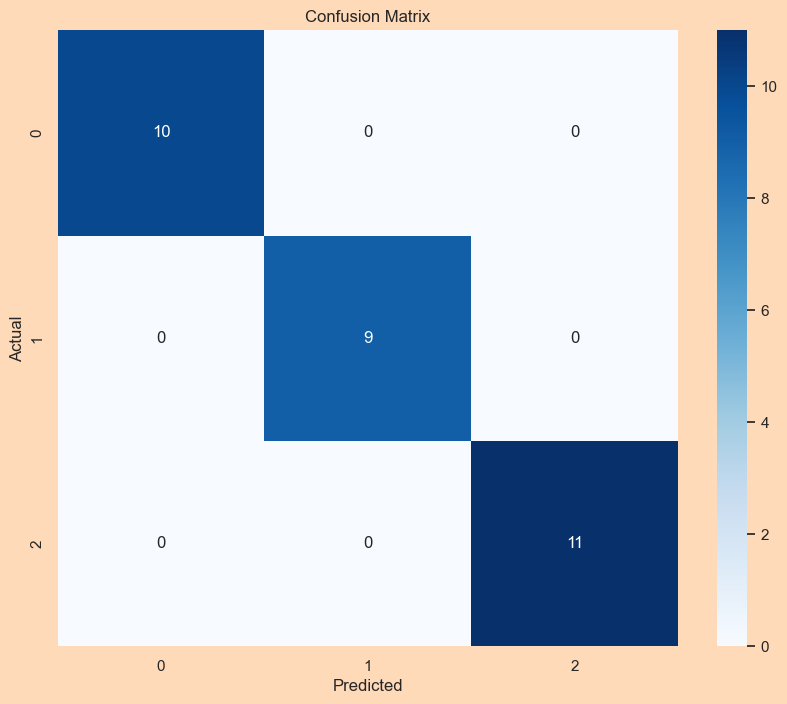

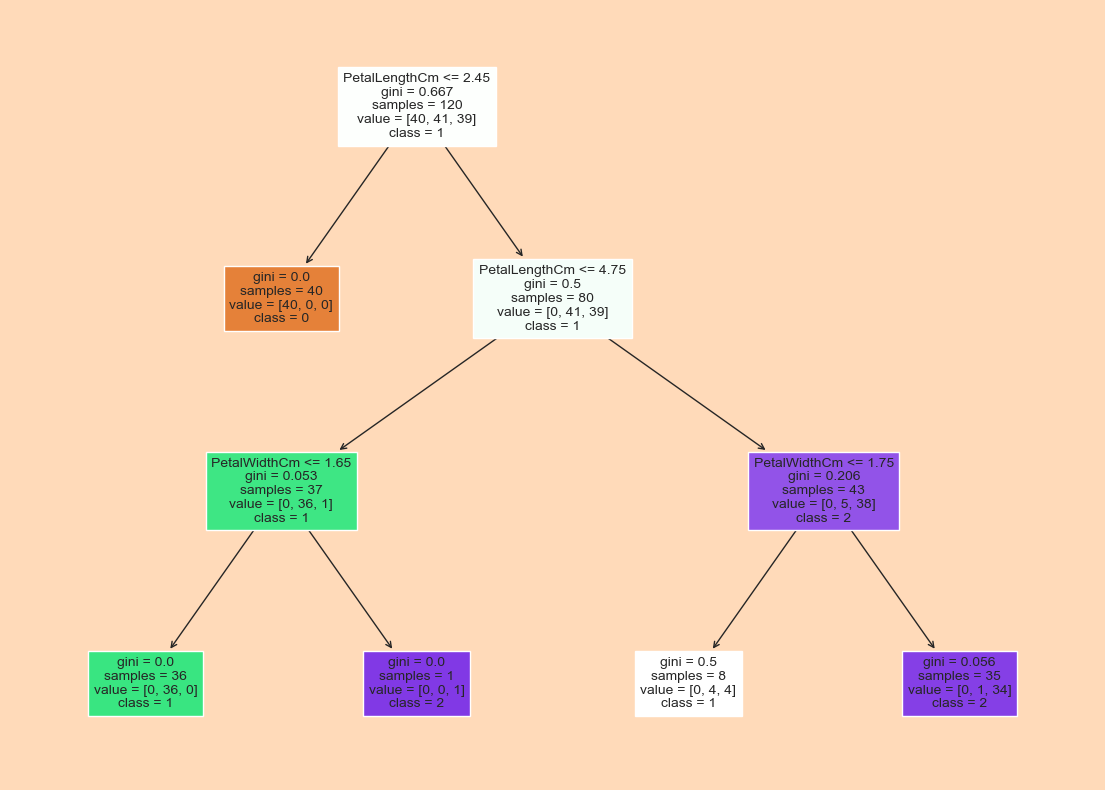

In [36]:
# predict the species of iris flower
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Chuyển đổi dữ liệu dạng categorical thành dạng số
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Chia dữ liệu thành 2 phần: train và test
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình
rf = DecisionTreeClassifier(max_depth=3, random_state=42)
rf.fit(X_train, y_train)

# Dự đoán
y_pred = rf.predict(X_test)

# Đánh giá mô hình
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# trực quan hóa kết quả
fig = plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Vẽ cây quyết định
from sklearn.tree import plot_tree
plot_tree(rf, feature_names=X.columns.astype(str), class_names=le.classes_.astype(str), filled=True, fontsize=10)

plt.show()



# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>C. Insights</b></div>

<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">
Trong quá trình khám phá toàn diện tập dữ liệu `Iris` bằng các công cụ trực quan phân tích như Matplotlib, Seaborn và Plotly, nhóm đã tìm hiểu sâu về các đặc tính của các loài hoa Iris. Trong phần này, nhóm sẽ chia sẻ những phát hiện thú vị nhất, bao gồm các đặc tính riêng biệt, sự khác nhau giữa các loài hoa:

- **Tập dữ liệu:**
  - Ngoài giá trị `SepalWidthCm` chứa một số ngoại lệ thì tất cả các giá trị khác còn lại đều khá ổn.
  - Cả `SepalLengthCm` và `SepalWitdhCm` đều có dạng phân phối chuẩn, `SepalWitdhCm` đạt đỉnh rõ rệt xung quanh giá trị 3 cm còn với `SepalLengthCm` thì nhiều quan sát tập trung trong khoảng từ 5 - 7 cm.
  - `PetalLengthCm` và `PetalWidthCm` cả 2 phân phối của 2 cột này đều cho thấy có 2 nhóm dữ liệu rõ rệt.

- **Đặc tính của các loài hoa:**
  - Ta có loài hoa `Virginica` đứng đầu trong 3 đặc tính là chiều dài đài hoa (SepalLengthCm), cả chiều dài và rộng của cánh hoa (Petal). 
  - Ngược lại với `Virginica`, loài `Setosa`có giá trị 3 đặc tính trên thấp nhất.
  - Loài `Virsicolor` có các đặc tính đều ở mức trung bình.

- **Sự khác biệt giữa các loài hoa:**
  - Từ một số đặc tính đã được rút trích ở trên, ta thấy rằng loài hoa có cánh hoa nhỏ, ngắn và lá đài ngắn nhưng chiều rộng lá đài lớn thì ta có thể suy ra đây là loài `Setosa`.
  - Loài mà có cả lá đài dài và cánh hoa vừa rộng vừa dài thì đó là loài `Virginica`.